In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/linas/Desktop/drugsComTrain_raw.csv')

In [3]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [4]:
df.shape

(161297, 7)

In [5]:
df.describe()

,uniqueID,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [6]:
df.review.count()

161297

In [7]:
# Atsiliepimų skaičius kiekvienais metais
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year 

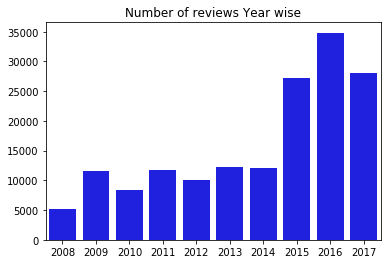

In [8]:
count_reviews = df['year'].value_counts().sort_index()
sns.barplot(count_reviews.index,count_reviews.values,color='blue')
plt.title('Number of reviews Year wise')
plt.show()


In [9]:
# Įvertinimų pasiskirstymas
df.rating.value_counts()

10    50989
9     27531
1     21619
8     18890
7      9456
5      8013
2      6931
3      6513
6      6343
4      5012
Name: rating, dtype: int64

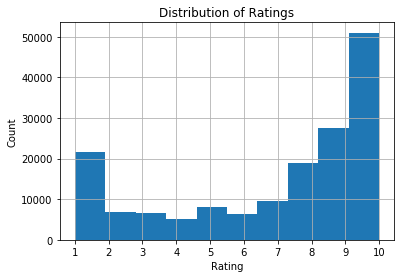

In [10]:
df.rating.hist(bins=10)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks([i for i in range(1, 11)]);

In [11]:
# Daugiausiai atsiliepimų gavę vaistai
df.groupby(['drugName'])['rating'].agg(['count', 'mean']).sort_values(by=['count', 'mean'], ascending=False)[:10]

,count,mean
drugName,,
Levonorgestrel,3657,7.391031
Etonogestrel,3336,5.802458
Ethinyl estradiol / norethindrone,2850,5.591930
Nexplanon,2156,5.673006
Ethinyl estradiol / norgestimate,2117,5.856873
Ethinyl estradiol / levonorgestrel,1888,5.799258
Phentermine,1543,8.786131
Sertraline,1360,7.497794
Escitalopram,1292,7.843653


In [12]:
df['condition'].nunique()

884

In [13]:
# 10 vaistų kategorijų, pagal didžiausia kiekį atsiliepimų
conditions = df['condition'].value_counts().head(10)
conditions[:10]

Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Weight Loss         3609
Obesity             3568
ADHD                3383
Name: condition, dtype: int64

In [14]:

top10 = {} 
for i in df.condition.unique():
    a = []
    for b in df[df.condition == i].drugName.unique():
        if np.sum(df.drugName == b) >= 10:
            a.append((b, np.sum(df[df.drugName == b].rating) / np.sum(df.drugName == b)))
    top10[i] = pd.DataFrame(data=a, columns=['drug', 'average_rating']).sort_values(by='average_rating', ascending=False).reset_index(drop=True)

In [15]:
# 10 Geriausiai įvertinti vaistai pagal tam tikrą kategoriją
top10['Depression'].iloc[:10]

,drug,average_rating
0,Desipramine,9.285714
1,Xanax XR,8.947368
2,Alprazolam,8.933144
3,Xanax,8.881579
4,Parnate,8.763158
5,St. john's wort,8.739130
6,Nefazodone,8.727273
7,Methylin ER,8.700000
8,Clomipramine,8.680000
9,Phenelzine,8.666667


In [16]:
# 10 Prasčiausiai įvertinti vaistai pagal tam tikrą kategoriją
top10['Depression'].iloc[-10:]

,drug,average_rating
76,Paliperidone,6.298077
77,Effexor,6.230189
78,Risperidone,6.200000
79,Vilazodone,6.187354
80,Trintellix,6.098734
81,Vortioxetine,6.069034
82,Strattera,5.520000
83,Atomoxetine,5.436893
84,Levomilnacipran,5.168317
85,Fetzima,5.151163


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   uniqueID     161297 non-null  int64         
 1   drugName     161297 non-null  object        
 2   condition    160398 non-null  object        
 3   review       161297 non-null  object        
 4   rating       161297 non-null  int64         
 5   date         161297 non-null  datetime64[ns]
 6   usefulCount  161297 non-null  int64         
 7   year         161297 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 9.8+ MB


In [ ]:
# Kuriami modeliai kurie pagal atsiliepimų turinį, prognozuos ar vaistų įvertinimas bus teigiamas (t.y. >5).

In [18]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [19]:
# Žodžių pavertimas į skaitmeninę reikšmę naudojant "TfidfVectorizer" algoritmą
vectorizer = TfidfVectorizer()
reviews_corpus = vectorizer.fit_transform(df.review)
reviews_corpus.shape

(161297, 49899)

In [20]:
sentiment = df["rating"].apply(lambda x: 1 if x > 5 else 0)


In [21]:
# Modelių apmokymas
X_train,X_test,Y_train,Y_test = train_test_split(reviews_corpus,sentiment,test_size=0.2,random_state=42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(129037, 49899) (129037,)
(32260, 49899) (32260,)


In [22]:
# Modelis naudojant RandomForestClassifier algoritmą
clf = RandomForestClassifier().fit(X_train, Y_train)

pred = clf.predict(X_test)

print((clf.score(X_test, Y_test)))
print(confusion_matrix(pred, Y_test))

0.8766274023558587
[[ 5746   142]
 [ 3838 22534]]


In [23]:
# Modelis naudojant DecisionTreeClassifier algoritmą
clf1 = tree.DecisionTreeClassifier().fit(X_train, Y_train)
pred1 = clf1.predict(X_test)

print((clf1.score(X_test, Y_test)))
print(confusion_matrix(pred1, Y_test))


0.8454432734035958
[[ 6969  2371]
 [ 2615 20305]]


In [24]:
from sklearn.metrics import classification_report

In [25]:
Y_pred = clf.predict(X_test)
Y_pred1 = clf1.predict(X_test)

In [26]:
# Modelių palyginimas
print(classification_report(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.60      0.74      9584
           1       0.85      0.99      0.92     22676

    accuracy                           0.88     32260
   macro avg       0.92      0.80      0.83     32260
weighted avg       0.89      0.88      0.87     32260

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      9584
           1       0.89      0.90      0.89     22676

    accuracy                           0.85     32260
   macro avg       0.82      0.81      0.81     32260
weighted avg       0.84      0.85      0.84     32260

